In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import missingno as msno
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
%ls

AMF_test_X_uDs0jHH.csv        amf_custom_metric_j7JZxnv.py
AMF_train_X_XCZw8r3.csv       brouillon_V3 (2).ipynb
AMF_train_Y_omYQJZL.csv       brouillon_V3.ipynb
Kaggle.ipynb                  random_file_8Nz0x4y.csv
MAP569_h.ipynb                res_v1


# **Data preprocessing**

In [3]:
X_train = pd.read_csv("AMF_train_X_XCZw8r3.csv")
Y_train = pd.read_csv("AMF_train_Y_omYQJZL.csv")

In [4]:
X_train["Day"] = X_train["Day"].str.replace("Date_", "").astype(int)
X_train["Trader"] = X_train["Trader"].str.replace("Trader_", "").astype(int)
Y_train["Trader"] = Y_train["Trader"].str.replace("Trader_", "").astype(int)

In [5]:
Y_train["type"] = Y_train["type"].astype("category")

In [6]:
tmp = X_train.merge(Y_train, on = "Trader")

In [7]:
X = tmp.drop(["Index", "type","Share"], axis=1)
y = tmp[["Trader","type"]]

In [8]:
X = X.fillna(X.mean())

# **Data Analysis**

In [9]:
df=tmp.drop(["Index", "Share"], axis=1)
df=df.fillna(X.median())

In [10]:
df['trader_1']=np.where(df['type']=='MIX' ,0 , np.where(df['type']=='NON HFT',1 ,  np.where(df['type']=='HFT',0,1)))
df['trader_2']=np.where(df['type']=='MIX' ,0 , np.where(df['type']=='NON HFT',1 ,  np.where(df['type']=='HFT',1,0)))
e=df.copy()
df=df.drop(["type"], axis=1)

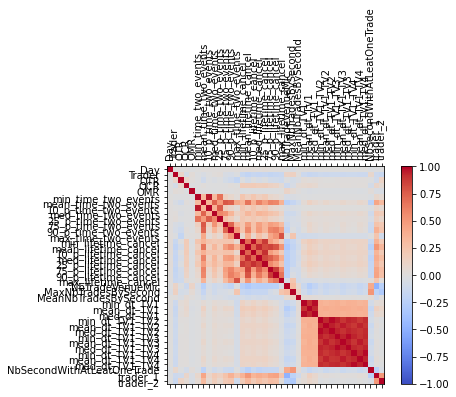

In [11]:
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

## **Normalisation** 

In [12]:
data=(df-df.median())/df.std()

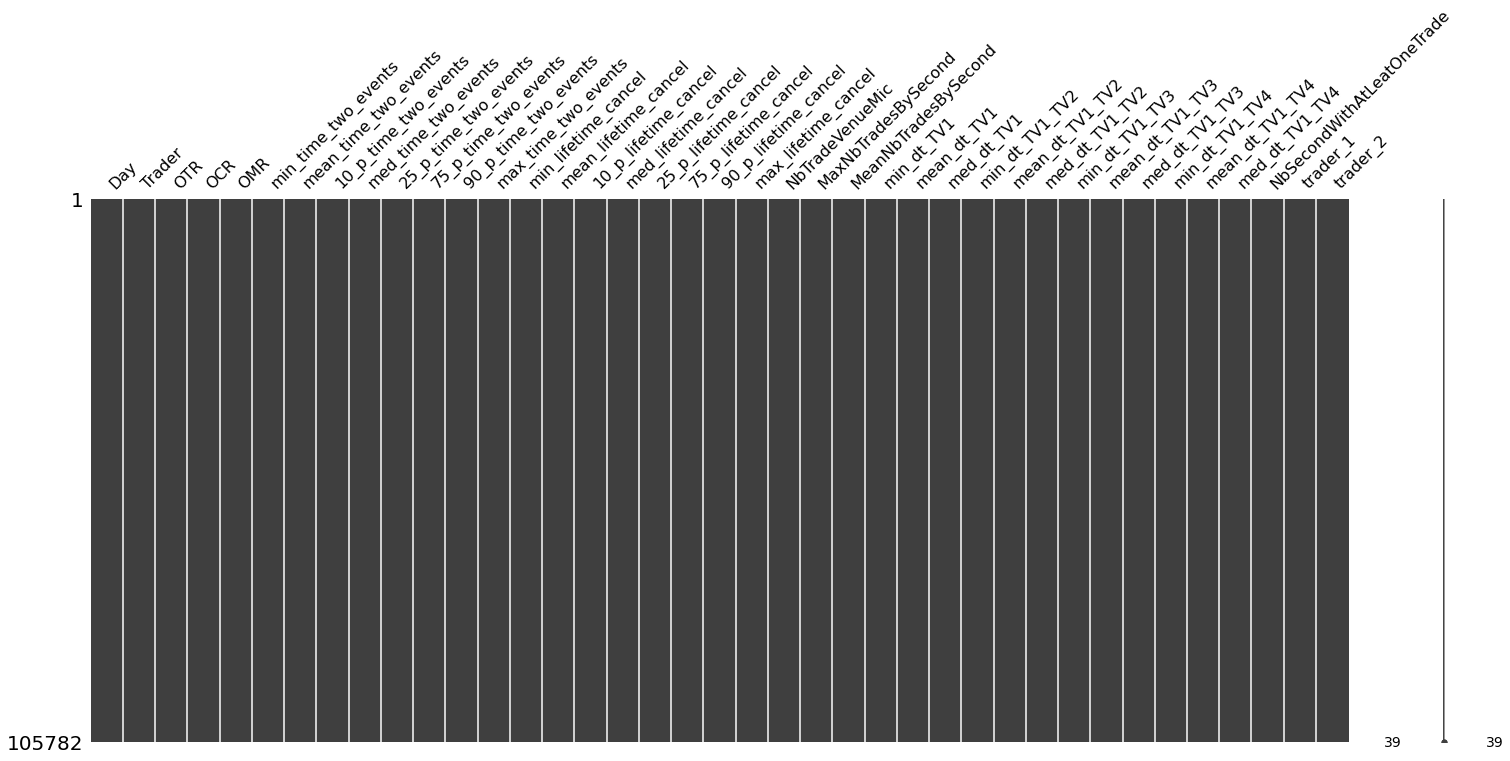

In [13]:
%matplotlib inline
msno.matrix(data)

## **Scikit K_means**

In [14]:
def elbow(x):
  Sum_of_squared_distances = []
  K = range(1,6)
  for k in K:
      print(k)
      km = KMeans(n_clusters=k)
      km = km.fit(x)
      Sum_of_squared_distances.append(km.inertia_)
  plt.plot(K, Sum_of_squared_distances, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Sum_of_squared_distances')
  plt.title('Elbow Method For Optimal k')
  plt.show()


1
2
3
4
5


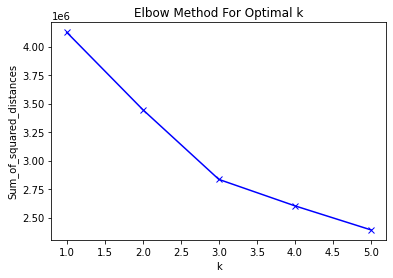

In [15]:
elbow(data)

3 semble justifié

In [16]:
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)
clust_labels, cent = doKmeans(data,3)
kmeans = pd.DataFrame(clust_labels)
data.insert((data.shape[1]),'kmeans',kmeans)

In [17]:
data.describe()

,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,25_p_time_two_events,...,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade,trader_1,trader_2,kmeans
count,105782.000000,105782.000000,105782.000000,105782.000000,1.057820e+05,105782.000000,105782.000000,1.057820e+05,1.057820e+05,105782.000000,...,1.057820e+05,105782.000000,105782.000000,1.057820e+05,105782.000000,1.057820e+05,105782.000000,105782.000000,105782.00000,105782.000000
mean,0.185288,0.081343,0.194293,0.176347,5.854091e-17,0.056435,0.503533,6.388788e-02,2.016085e-01,0.098525,...,1.404677e-01,0.159674,0.151077,1.412202e-01,0.163150,1.526924e-01,0.367599,0.517557,-0.97372,1.733707
std,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,...,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000,1.00000,0.458462
min,-1.500322,-2.217757,-0.047713,-0.038827,-2.372837e-01,0.000000,-0.052621,-6.740664e-08,-2.044302e-03,-0.000041,...,-5.936815e-07,-0.130574,-0.038797,-5.971978e-07,-0.130414,-3.869470e-02,-0.148880,0.000000,-2.00070,0.000000
25%,-0.692456,-0.803282,-0.027908,-0.028335,-2.234144e-01,0.000000,-0.038707,-6.740664e-08,-1.793897e-03,-0.000040,...,-5.877388e-07,-0.102228,-0.035139,-5.655146e-07,-0.101639,-3.491849e-02,-0.113210,0.000000,-2.00070,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,-1.788001e-19,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,-4.216636e-18,0.000000,0.000000,0.00000,2.000000
75%,1.154094,1.065222,0.107172,0.161145,0.000000e+00,0.000000,0.709898,1.275763e-05,1.014553e-02,0.001182,...,0.000000e+00,0.010488,0.004134,0.000000e+00,0.010676,4.478343e-03,0.379953,0.000000,0.00000,2.000000
max,1.731141,1.720072,128.873933,200.495043,1.853601e+02,33.915935,10.492452,3.250903e+01,1.058065e+01,22.660211,...,1.836600e+01,17.232977,18.219235,1.847477e+01,17.174274,1.830152e+01,19.957610,2.449693,0.00000,2.000000


In [18]:
index_0 = [i for i,j in enumerate(data["kmeans"]) if j == 0]
index_1 = [i for i,j in enumerate(data["kmeans"]) if j == 1]
index_2= [i for i,j in enumerate(data["kmeans"]) if j == 2]

e["MIX"]=np.where(e['type']=='MIX' ,1,0)
e["HFT"]=np.where(e['type']=='HFT' ,1,0)
e["NON_HFT"]=np.where(e['type']=='NON HFT' ,1,0)

MIX_0= e.loc[index_0]["MIX"].mean()
HFT_0 = e.loc[index_0]["HFT"].mean()
NON_HFT_0=e.loc[index_0]["NON_HFT"].mean()
error_0= 1-max(MIX_0,HFT_0,NON_HFT_0)
weighted_error_0= e.loc[index_0].count()[0]*error_0

MIX_1= e.loc[index_1]["MIX"].mean()
HFT_1 = e.loc[index_1]["HFT"].mean()
NON_HFT_1=e.loc[index_1]["NON_HFT"].mean()
error_1= 1-max(MIX_1,HFT_1,NON_HFT_1)
weighted_error_1= e.loc[index_1].count()[0]*error_1

MIX_2= e.loc[index_2]["MIX"].mean()
HFT_2 = e.loc[index_2]["HFT"].mean()
NON_HFT_2=e.loc[index_2]["NON_HFT"].mean()
error_2= 1-max(MIX_2,HFT_2,NON_HFT_2)
weighted_error_2= e.loc[index_2].count()[0]*error_2

error=weighted_error_0+weighted_error_1+weighted_error_2

In [19]:
error/e.count()[0]

0.3899812822597417

In [20]:
e.loc[index_2].describe()

,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,25_p_time_two_events,...,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade,trader_1,trader_2,MIX,HFT,NON_HFT
count,78396.000000,78396.000000,78396.000000,78396.000000,78396.000000,78396.000000,78396.000000,78396.000000,78396.000000,78396.000000,...,78396.000000,78396.000000,78396.000000,78396.000000,78396.000000,78396.000000,78396.000000,78396.000000,78396.000000,78396.000000
mean,16.555411,283.571828,40.602549,11.020789,172.206015,2.502435,745.450165,3.259343,43.756234,7.688623,...,152.858227,80.367662,318.537636,152.392905,426.819927,0.067529,0.398260,0.601740,0.330731,0.067529
std,8.660379,111.368670,150.734965,30.819354,790.818547,62.731123,1633.638908,64.194209,244.824829,76.335859,...,596.293533,550.243409,811.643057,592.766945,721.796448,0.250937,0.489543,0.489543,0.470479,0.250937
min,2.000000,10.000000,1.044444,2.000000,1.003407,0.000000,0.000065,0.000000,0.000000,0.000000,...,0.000002,0.000001,0.000008,0.000003,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,209.000000,3.857143,2.369989,6.816283,0.000000,49.760126,0.000004,1.175167,0.001074,...,3.413289,0.000020,34.642160,3.572397,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.000000,264.000000,9.338609,3.559292,140.532563,0.000000,129.428022,0.000467,7.062748,0.139916,...,31.017500,0.000811,125.516502,30.740074,162.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,25.000000,386.000000,31.777778,7.865263,164.469153,0.000000,450.516006,0.044469,25.636113,2.335280,...,65.671542,0.001000,232.913575,65.205258,488.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,30.000000,461.000000,17561.000000,1493.000000,127861.000000,5040.690400,18387.019741,5040.690400,21542.248000,5049.621000,...,22669.896751,20757.018000,20757.018000,20757.018000,12966.000000,1.000000,1.000000,1.000000,1.000000,1.000000


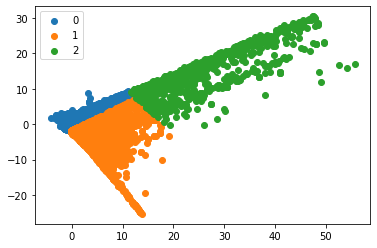

In [23]:

pca = PCA(2)
  
#Transform the data
num = pca.fit_transform(data)
 
#Applying our function
label, cent =doKmeans(num,3)
 
#Visualize the results
 
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(num[label == i , 0] , num[label == i , 1] , label = i)
plt.legend()
plt.show()

In [22]:
kmeans = pd.DataFrame(label)
data.insert((data.shape[1]),'kmeans_2',kmeans)

In [23]:
index_0 = [i for i,j in enumerate(data["kmeans_2"]) if j == 0]
index_1 = [i for i,j in enumerate(data["kmeans_2"]) if j == 1]
index_2= [i for i,j in enumerate(data["kmeans_2"]) if j == 2]

e["MIX"]=np.where(e['type']=='MIX' ,1,0)
e["HFT"]=np.where(e['type']=='HFT' ,1,0)
e["NON_HFT"]=np.where(e['type']=='NON HFT' ,1,0)

MIX_0= e.loc[index_0]["MIX"].mean()
HFT_0 = e.loc[index_0]["HFT"].mean()
NON_HFT_0=e.loc[index_0]["NON_HFT"].mean()
error_0= 1-max(MIX_0,HFT_0,NON_HFT_0)
weighted_error_0= e.loc[index_0].count()[0]*error_0

MIX_1= e.loc[index_1]["MIX"].mean()
HFT_1 = e.loc[index_1]["HFT"].mean()
NON_HFT_1=e.loc[index_1]["NON_HFT"].mean()
error_1= 1-max(MIX_1,HFT_1,NON_HFT_1)
weighted_error_1= e.loc[index_1].count()[0]*error_1

MIX_2= e.loc[index_2]["MIX"].mean()
HFT_2 = e.loc[index_2]["HFT"].mean()
NON_HFT_2=e.loc[index_2]["NON_HFT"].mean()
error_2= 1-max(MIX_2,HFT_2,NON_HFT_2)
weighted_error_2= e.loc[index_2].count()[0]*error_2

error=weighted_error_0+weighted_error_1+weighted_error_2

In [24]:
error/e.count()[0]

0.3970524285795315

K_means ne marche pas bien !

## **Scikit DBSCAN**

In [25]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

data_transformed = StandardScaler().fit_transform(data)
clustering = DBSCAN(eps=1, min_samples=10).fit(data_transformed)
clustering.labels_

array([-1, -1, -1, ..., -1, -1, -1])

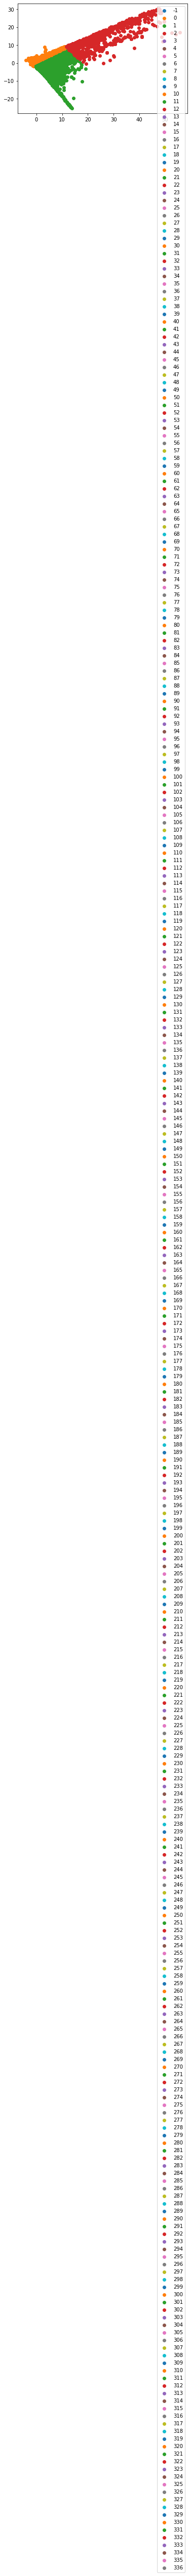

In [24]:
#Visualize the results
 
u_labels = np.unique(clustering.labels_)
for i in u_labels:
    plt.scatter(num[label == i , 0] , num[label == i , 1] , label = i)
plt.legend()
plt.show()

#**Training phase**

Les données sont prêtes. Suivantes on les coupe en train et test set.

y contient à la fois Trader et type !

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)


In [26]:
X_train_drop_trader = X_train.drop("Trader", axis=1)

X_test_trader = X_test["Trader"]
X_test_trader = X_test_trader.to_numpy()
X_test_drop_trader = X_test.drop("Trader", axis=1)



In [27]:
groudtruth = y_test.drop_duplicates().sort_values(by=['Trader']).set_index("Trader")["type"]
groudtruth

Trader
10     NON HFT
16     NON HFT
26         MIX
35         HFT
38         MIX
        ...   
442    NON HFT
446    NON HFT
451        MIX
453        HFT
461        MIX
Name: type, Length: 83, dtype: category
Categories (3, object): ['HFT', 'MIX', 'NON HFT']

In [28]:
groudtruth[groudtruth == 'MIX'].count()/83

0.2891566265060241

In [29]:
groudtruth[groudtruth == 'HFT'].count()/83

0.18072289156626506

In [30]:
# function aggreates the voting process for final result
# thresholds are fixed by grid search

def voting_result(X, y, threshold_hft = 0.75, threshold_mix = 0.38):
    """
    parameters:
    X: df with full features
    y: df with predicted results
    
    return: 
    final prediction result in pd.Series format
    """
    X_trader = X["Trader"].to_numpy()
    res_tmp = pd.DataFrame([X_trader, y]).transpose()
    res_interm = res_tmp.groupby([0,1]).size()
    res_tab = res_interm.unstack(level=-1).fillna(0)
    pred_tab = pd.Series(dtype = str)
    for index, row in res_tab.iterrows():
        somme = row[0] + row[1] + row[2]
        if row[0]/somme > threshold_hft:
            pred_tab.at[index] = 'HFT'
        elif row[1]/somme > threshold_mix:
            pred_tab.at[index] = 'MIX'
        else:
            pred_tab.at[index] = 'NON HFT'
    pred_tab = pred_tab.astype("category")
    
    return pred_tab

### Random forest classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

clf = RandomForestClassifier(n_estimators = 250, max_depth=20, random_state=0, n_jobs = -1)
clf.fit(X_train_drop_trader, y_train['type'])

y_predict = clf.predict(X_test.drop("Trader", axis=1))



In [32]:
pred_tab = voting_result(X_test, y_predict)
f1_score(groudtruth, pred_tab, average='micro')

0.9518072289156626

### XGBoost classifier

In [33]:
from xgboost import XGBClassifier

param = {'n_estimators':200,
         'max_depth':10, 
        'random_state':0,
        'n_jobs':-1,
        'booster':'dart',
        'rate_drop':0.1}
xgbc = XGBClassifier(n_estimators = 200, max_depth=20, random_state=0, n_jobs = -1)
# xgbc = XGBClassifier(param)
xgbc.fit(X_train_drop_trader, y_train['type'])
y_predict_xgb = xgbc.predict(X_test.drop("Trader", axis=1))


In [34]:
pred_tab = voting_result(X_test, y_predict_xgb)
f1_score(groudtruth, pred_tab, average='micro')

0.9759036144578314

### AdaBoost classifier

In [35]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators = 50, random_state=0)
clf.fit(X_train_drop_trader, y_train['type'])
y_predict = clf.predict(X_test.drop("Trader", axis=1))

In [36]:
pred_tab = voting_result(X_test, y_predict)
f1_score(groudtruth, pred_tab, average='micro')

0.8795180722891566

### Neural net classifier

In [37]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train_drop_trader, y_train['type'])

y_predict = clf.predict(X_test.drop("Trader", axis=1))

In [38]:
pred_tab = voting_result(X_test, y_predict)
f1_score(groudtruth, pred_tab, average='micro')

0.8433734939759037

In [39]:
def feature_Selection_for_classification(X,Y):
    from xgboost import XGBClassifier
    from xgboost import plot_importance
    from sklearn.model_selection import train_test_split
    from sklearn.feature_selection import SelectFromModel
    from sklearn.metrics import accuracy_score

    # splitting data in test train 
    X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=42, test_size=.33)
    
    # creating model 
    model = XGBClassifier()
    
    # fitting model 
    model.fit(X_train,y_train)
     
    #plot feature importance
    plot_importance(model)
    plt.show()

    
    #selecting features based on model 
    thresholds = sorted(model.feature_importances_)
    sorted_idx = np.argsort(model.feature_importances_)[::-1]
    for index in sorted_idx:
        print(" the features and thier importance :",[X_train.columns[index], model.feature_importances_[index]]) 
    
    for thresh in thresholds:
       # select features using threshold
        selection = SelectFromModel(model, threshold=thresh, prefit=True)
        select_X_train = selection.transform(X_train)
        
        # train model
        print(select_X_train.shape)
        selection_model = XGBClassifier()
        selection_model.fit(select_X_train, y_train)
       
        # eval model
        select_X_test = selection.transform(X_test)
        print("shape of selection test",select_X_test.shape)
        y_pred = selection_model.predict(select_X_test)
       
        #predictions = [round(value) for value in y_pred]
        scoref1=f1_score(y_test,y_pred, average='micro')
        print("Thresh=",thresh, " and f1_score is :", scoref1)

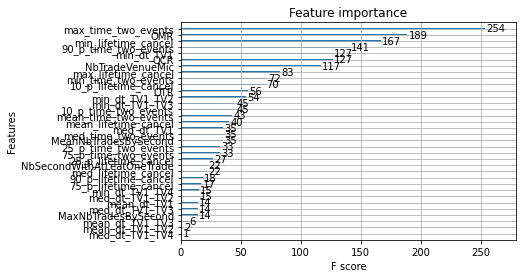

 the features and thier importance : ['min_lifetime_cancel', 0.18668927]
 the features and thier importance : ['75_p_lifetime_cancel', 0.07081269]
 the features and thier importance : ['med_dt_TV1_TV2', 0.06271831]
 the features and thier importance : ['NbTradeVenueMic', 0.061733034]
 the features and thier importance : ['10_p_lifetime_cancel', 0.054671146]
 the features and thier importance : ['mean_lifetime_cancel', 0.054295506]
 the features and thier importance : ['med_lifetime_cancel', 0.044181135]
 the features and thier importance : ['max_lifetime_cancel', 0.042812165]
 the features and thier importance : ['MaxNbTradesBySecond', 0.038561348]
 the features and thier importance : ['max_time_two_events', 0.034267724]
 the features and thier importance : ['OCR', 0.030784415]
 the features and thier importance : ['90_p_time_two_events', 0.025627166]
 the features and thier importance : ['10_p_time_two_events', 0.023577819]
 the features and thier importance : ['OMR', 0.02094723]
 the

In [ ]:
feature_Selection_for_classification(X.drop("Trader", axis=1), y['type'])

## 2 phases model

In [ ]:
y[y['type']=='NON HFT'].count()

In [ ]:
y[y['type']=='MIX'].count()

In [ ]:
y[y['type']=='HFT'].count()

# Testing phase

In [ ]:
X_final = pd.read_csv("AMF_test_X_uDs0jHH.csv")

X_final["Day"] = X_final["Day"].str.replace("Date_", "").astype(int)

In [ ]:
X_final = X_final.drop(["Index","Share"], axis=1)
X_final = X_final.fillna(X_final.mean())

In [ ]:
y_predict_final = xgbc.predict(X_final.drop("Trader", axis=1))
pred_tab_final = voting_result(X_final, y_predict_final)


In [ ]:
pred_tab_final

In [ ]:
pred_tab_final.to_csv("res_v1")